In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

# deep learning libraries
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image

import cv2

import warnings
warnings.filterwarnings('ignore')


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten ,Dropout
from keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import layers
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMG_WIDTH=224
IMG_HEIGHT=224
IMG_DIM = (IMG_WIDTH, IMG_HEIGHT)

In [7]:
train_path = '/content/drive/MyDrive/Final Year Project/Dataset_Practice_Braintumor_Multiclass_detect/Training'
test_path = '/content/drive/MyDrive/Final Year Project/Dataset_Practice_Braintumor_Multiclass_detect/Testing'

In [5]:
import os

In [8]:
print(os.listdir(train_path));
print(os.listdir(test_path));

['meningioma_tumor', 'pituitary_tumor', 'glioma_tumor', 'no_tumor']
['glioma_tumor', 'pituitary_tumor', 'no_tumor', 'meningioma_tumor']


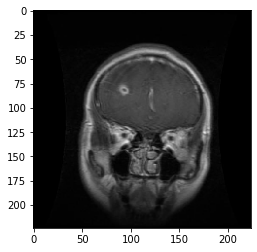

In [9]:
from tensorflow.keras.preprocessing.image import load_img
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
image=load_img(train_path+'/glioma_tumor/gg (794).jpg',target_size=(224,224));
imshow(image)

In [10]:
dataset_path=os.listdir(train_path)
tumor_types=os.listdir(train_path)
print("tumor types:",tumor_types)

print("Types of tumor count: ",len(dataset_path))

tumor types: ['meningioma_tumor', 'pituitary_tumor', 'glioma_tumor', 'no_tumor']
Types of tumor count:  4


In [11]:
train_gen = ImageDataGenerator(
                  rescale=1./255.,
                  horizontal_flip = True,
                   shear_range = 0.2,
                  zoom_range = 0.2
                 )

In [12]:
train_generator = train_gen.flow_from_directory(
    directory = train_path, # images data path / folder in which images are there
    color_mode="rgb",
   target_size = (224, 224),
    batch_size = 16,
   class_mode = 'categorical',
    shuffle=True,
    seed=42
)

Found 1803 images belonging to 4 classes.


In [13]:
test_gen = ImageDataGenerator(rescale = 1./255,zoom_range = 0.2)

In [14]:
valid_generator = test_gen.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=16,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 394 images belonging to 4 classes.


In [15]:
# input shape of one record is (224,224,3) , 16: is the batch size
x,y = next(train_generator)
x.shape

(16, 224, 224, 3)

In [16]:
y.shape

(16, 4)

In [17]:
a = train_generator.class_indices
class_names = list(a.keys())  # storing class/breed names in a list

In [18]:
#Prediction classes categorical
class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [19]:
type(a)

dict

In [21]:
#Prediction index corresponding to categorical classes
class_index=list(a.values())
print(class_index)

[0, 1, 2, 3]


In [23]:
b = valid_generator.class_indices
class_names1 = list(b.keys())
print(class_names1)
class_index1=list(b.values())
print(class_index1)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
[0, 1, 2, 3]


In [24]:
base_model = ResNet50(
                     include_top=False,
                     weights='imagenet',
                     input_shape=(224,224,3)
                     )
 
base_model.trainable=False

94765736/94765736 [==============================] - 1s 0us/step


In [25]:
 
model = tf.keras.Sequential([
        base_model,  
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])

In [26]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 2048)       14336     
 ormalization)                                                   
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0

In [ ]:
history =model.fit_generator(train_generator,
                    epochs=50,
                    steps_per_epoch=len(train_generator),
                    validation_data=valid_generator,
                    validation_steps=len(valid_generator),
                    
)

Epoch 1/50
113/113 [==============================] - 615s 5s/step - loss: 1.3927 - accuracy: 0.2718 - val_loss: 1.3876 - val_accuracy: 0.2919
Epoch 2/50
113/113 [==============================] - 362s 3s/step - loss: 1.3472 - accuracy: 0.3699 - val_loss: 1.4015 - val_accuracy: 0.3274
Epoch 3/50
 39/113 [=========>....................] - ETA: 3:20 - loss: 1.2083 - accuracy: 0.4423

In [ ]:
model.save('/content/drive/MyDrive/Final Year Project/'+'odel_name.h5')

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
# plot results
# accuracy
plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy:{str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')

In [ ]:
accuracy_score = model.evaluate(valid_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))
 
print("Loss: ",accuracy_score[0])